# A2 - Python

This assignment will cover topics of classification.

Make sure that you keep this notebook named as "a2.ipynb" 

Any other packages or tools, outside those listed in the assignments or Canvas, should be cleared
by Dr. Brown before use in your submission.

## Q0 - Setup

The following code looks to see whether your notebook is run on Gradescope (GS), Colab (COLAB), or the linux Python environment you were asked to setup.

In [58]:
import re 
import os
import platform 
import sys 

# flag if notebook is running on Gradescope 
if re.search(r'amzn', platform.uname().release): 
    GS = True
else: 
    GS = False

# flag if notebook is running on Colaboratory 
try:
  import google.colab
  COLAB = True
except:
  COLAB = False

# flag if running on Linux lab machines. 
cname = platform.uname().node
if re.search(r'(guardian|colossus|c28)', cname):
    LLM = True 
else: 
    LLM = False

print("System: GS - %s, COLAB - %s, LLM - %s" % (GS, COLAB, LLM))

System: GS - False, COLAB - False, LLM - False


### Notebook Setup 

It is good practice to list all imports needed at the top of the notebook. You can import modules in later cells as needed, but listing them at the top clearly shows all which are needed to be available / installed.

If you are doing development on Colab, the otter-grader package is not available, so you will need to install it with pip (uncomment the cell directly below).

In [59]:
# Only uncomment if you developing on Colab 
# if COLAB == True: 
#     print("Installing otter:")
#     !pip install otter-grader==4.2.0 

In [60]:
# Import standard DS packages 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import textwrap
%matplotlib inline

from sklearn import tree        # decision tree classifier
from sklearn import neighbors   # knn classifier
from sklearn import naive_bayes # naive bayes classifier 
from sklearn import svm         # svm classifier
from sklearn import ensemble    # ensemble classifiers
from sklearn import metrics     # performance evaluation metrics
from sklearn import model_selection
from sklearn import preprocessing 
from sklearn import pipeline
# import graphviz, pydotplus

from sklearn.model_selection import train_test_split, StratifiedKFold 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score,mean_squared_error
from sklearn.metrics import confusion_matrix

# Package for Autograder 
import otter 
grader = otter.Notebook()

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [61]:
grader.check("q0")

q0 results: All test cases passed!

# Q1 - Exploratory Data Analysis 

Consider the `movies` data set available on Canvas. The data set is made up of over 600 randomly selected movies, released before 2016, with information extracted from IMDB and Rotten Tomatoes. A code book on the variables is also provided.

You should explore the files a bit in a text editor to understand the format. The variables are made up of different types: nominal, ordinal, numeric, etc. We will refer to the different variables by their column / codebook names.


<!-- BEGIN QUESTION -->

## Q1(a) - Examine data for loading 

Look at the `movies` data set.  Is there any missing data in the `movies` data set? 
If so, how is it encoded? 

Missing data is encoded as:   
> NA

<!-- END QUESTION -->

## Q1(b) - Load the data

Load the movies data into a DataFrame `q1movies`.  Is there any missing data in the `movies` data set? 
If yes, make sure to encode those missing values when reading the data in pandas `read_csv` function. 


In [62]:
# Read in movies data with pandas "read_csv" function
#  Use column names from the original csv file 

q1movies = pd.read_csv("data/movies.csv", sep= ",", na_values="NA")

q1movies.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,...,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5,imdb_url,rt_url
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,...,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria,http://www.imdb.com/title/tt1869425/,//www.rottentomatoes.com/m/filly_brown_2012/
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,...,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy,http://www.imdb.com/title/tt0205873/,//www.rottentomatoes.com/m/dish/
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,...,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban,http://www.imdb.com/title/tt0118111/,//www.rottentomatoes.com/m/waiting_for_guffman/
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,...,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen,http://www.imdb.com/title/tt0106226/,//www.rottentomatoes.com/m/age_of_innocence/
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,...,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover,http://www.imdb.com/title/tt0388230/,//www.rottentomatoes.com/m/10004684-malevolence/


In [63]:
grader.check("q1b")

q1b results: All test cases passed!

## Q1(c) - Clean data 

We want to clean up data with respect to the missing values. 

Ignore any missing values in the `studio`, `dvd_rel_year`, `dvd_rel_month`, `dvd_rel_day`, and all variables including and listed after `best_pic_nom`. For other missing values, remove the sample that contains the missing value.

Save the resulting DataFrame in the `movies` variable.  

In [64]:

# Ignore missing values in "studio", "dvd_rel_year", "dvd_rel_month", 
#   "dvd_rel_day", and all varaibles including and after "best_pic_nom"
# For other missing values, remove the sample that contains the missing value. 
cleanlist = list(q1movies.columns[:18])
extraIgnorelist = ["studio","dvd_rel_year","dvd_rel_month","dvd_rel_day"]
cleanlist = [i for i in cleanlist if i not in extraIgnorelist]
movies = q1movies.dropna(subset=cleanlist)
movies.shape

(645, 32)

In [65]:
grader.check("q1c")

q1c results: All test cases passed!

## Q1(d) - Statistics, part 1

For the following variables, report out a five number summary:
`critics_score` and `runtime`

Store results in a DataFrame: `q1d`

*Hint:* consider using the `describe` function.


In [66]:

# Report five number summary for variables `critics_score` and `runtime` in 
#  a DataFrame "q1d" 
#  Rows should represent: min, Q1 - 25%, Q2 - 50%, Q3 - 50%, max 
#  Columns should be `critics_score` then `runtime` 

q1d = movies[['critics_score','runtime']].describe().iloc[3:,:]
q1d

# """ # END PROMPT;
# q1d

,critics_score,runtime
min,1.0,39.0
25%,33.0,92.0
50%,61.0,103.0
75%,83.0,116.0
max,100.0,267.0


In [67]:
grader.check("q1d")

q1d results: All test cases passed!

## Q1(e) - Statistics, part 2 

Report the mean, median, and mode of `audience_score` and `imdb_rating` to the given variables. 

In [68]:
# Report mean, median and mode of "audience_score" and "imdb_rating" 

# For audience_score- 
q1e_as_mean = statistics.mean(movies["audience_score"])
q1e_as_median = statistics.median(movies["audience_score"])
q1e_as_mode = statistics.mode(movies["audience_score"]) 

# For imdb_rating- 
q1e_ir_mean = statistics.mean(movies["imdb_rating"])
q1e_ir_median = statistics.median(movies["imdb_rating"])
q1e_ir_mode = statistics.mode(movies["imdb_rating"])


In [69]:
grader.check("q1e")

q1e results: All test cases passed!

## Q1(f) - Statistics, part 3

Report the first quartile, 37th percentile, third quartile, and 83rd percentile
for `audience_score` and `imdb_rating` and assign it to the given variables.  

In [70]:
# Report first quartile, 31st percentile, third quartile, and 90th percentile
#  of "audience_score" and "imdb_rating" 

# For audience_score- 
q1f_as_q1 = statistics.quantiles(movies["audience_score"])[0]
q1f_as_p37 = statistics.quantiles(movies["audience_score"], n=100)[36]
q1f_as_q3 = statistics.quantiles(movies["audience_score"])[2]
q1f_as_p83 = statistics.quantiles(movies["audience_score"], n=100)[82]

# For imdb_rating- 
q1f_ir_q1 = statistics.quantiles(movies["imdb_rating"])[0]
q1f_ir_p37 = statistics.quantiles(movies["imdb_rating"], n=100)[36]
q1f_ir_q3 = statistics.quantiles(movies["imdb_rating"])[2]
q1f_ir_p83 = statistics.quantiles(movies["imdb_rating"], n=100)[82]


In [71]:
grader.check("q1f")

q1f results: All test cases passed!

<!-- BEGIN QUESTION -->

## Q1(g) Visualization: Single Variable 

I highly encourage looking at the [Fundamentals of Visualization](https://clauswilke.com/dataviz/index.html) reference book to guide in the creation of “good” visualizations requested below.


Create a bar plot for the `genre` variable; display only the the top 5 genres.

Text(0, 0.5, 'Movie Genre')

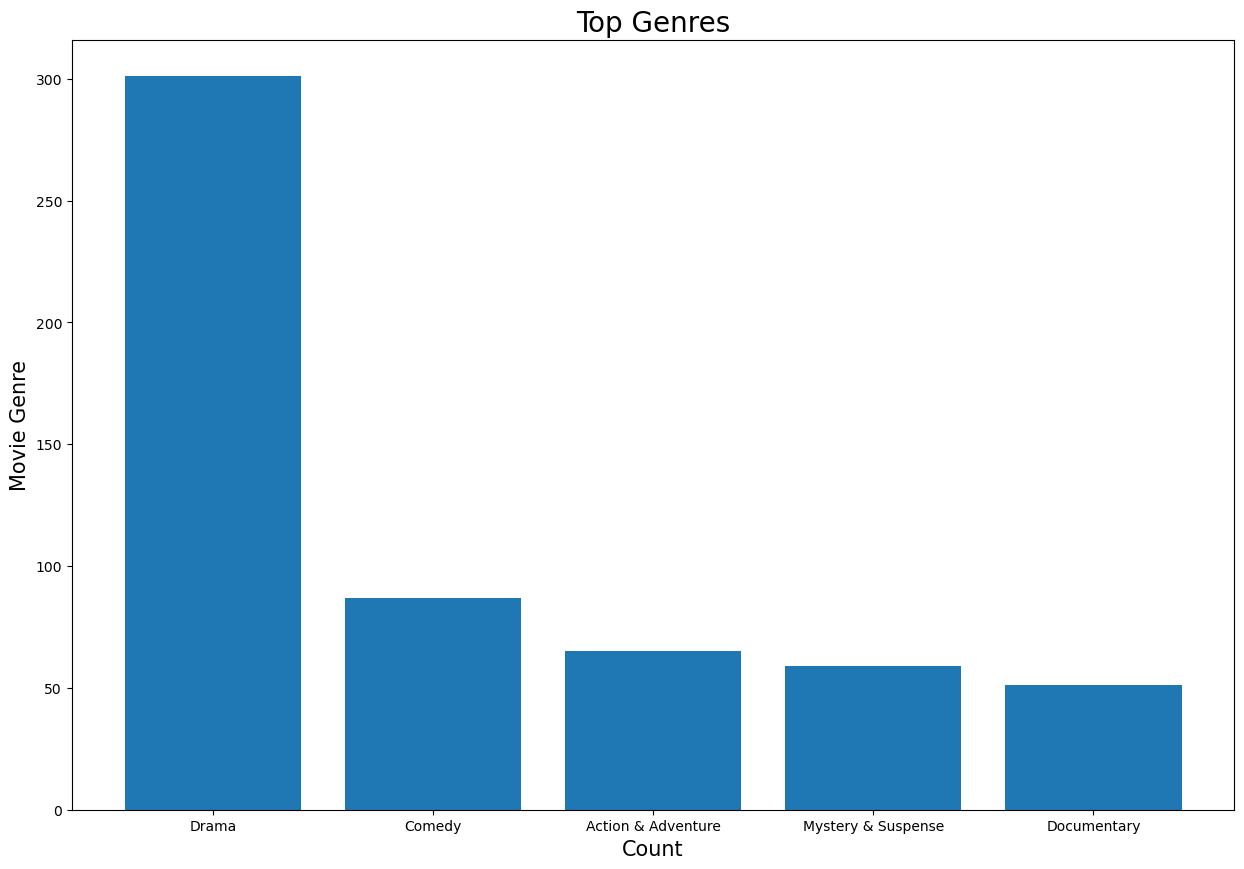

In [72]:

# Create bar plot for "genre", with top 5 genres 
genresSummary = movies.groupby("genre")["genre"].count().sort_values(ascending=False)[:5]
plt.figure(figsize=(15,10))
plt.bar(genresSummary.index,genresSummary)
plt.title("Top Genres", fontsize = 20)
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Movie Genre", fontsize = 15)



<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(h) Visualization: Single Variable

Create a horizontal bar plot for `mpaa_rating`, sorted by rating (let 'Unrated' be last).

Text(0, 0.5, 'Movie Genre')

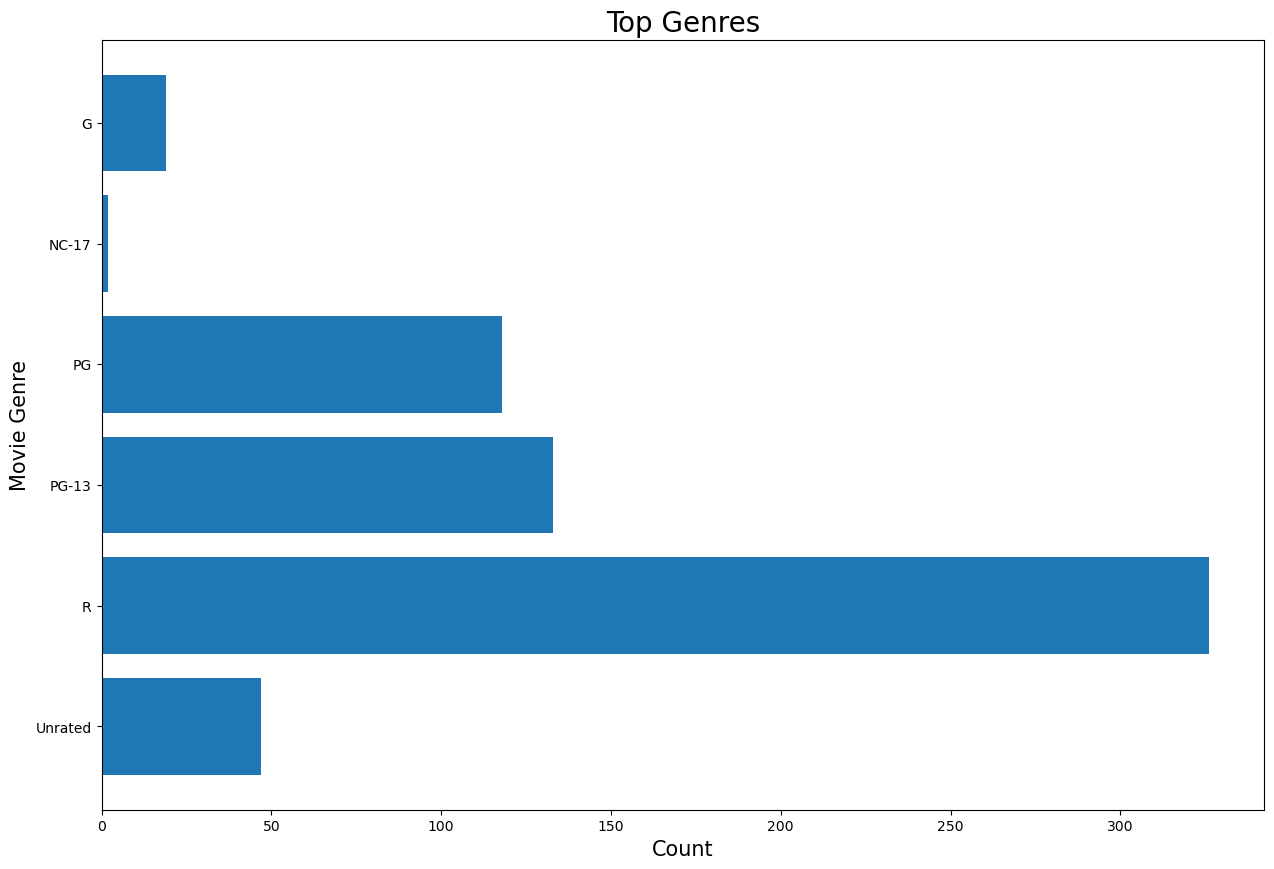

In [73]:

# Create a horizontal bar plot for mpaa_rating, sorted by rating. 

ratingSummary = movies.groupby("mpaa_rating")["mpaa_rating"].count()
ratingSummary = ratingSummary.sort_values(key=lambda x: x.index, ascending=False)

plt.figure(figsize=(15,10))
plt.barh(ratingSummary.index,ratingSummary)
plt.title("Top Genres", fontsize = 20)
plt.xlabel("Count", fontsize = 15)
plt.ylabel("Movie Genre", fontsize = 15)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(i) Visualization: Two Variables 

Create a violin plot for `audience_score` grouped by `genre` (use only the top 5 genres).

You may want to loop at the `textwrap` module to get ticklabels formatted well. 


Text(0, 0.5, 'Audience Scores')

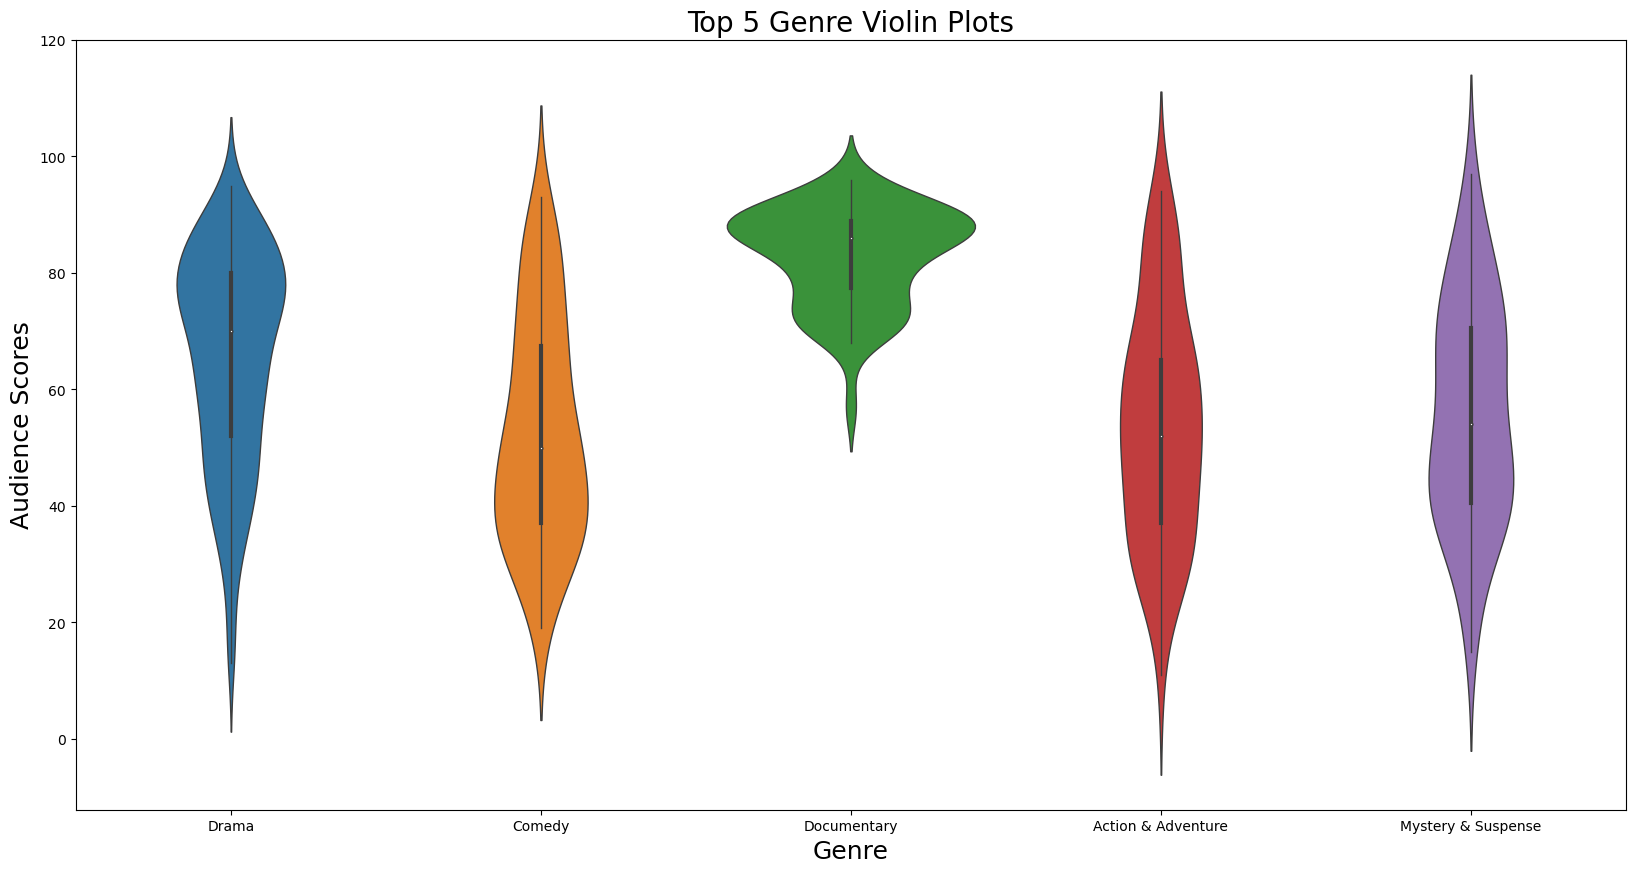

In [183]:

# Create a violin plot for `audience_score` grouped by top 5 `genres`
topGenres = movies.groupby("genre")["genre"].count().sort_values(ascending=False)[:5].index.to_list()
plotData = movies[["genre", "audience_score"]][movies.genre.isin(topGenres)]

plt.figure(figsize=(20,10))
sns.violinplot(data=plotData, x="genre", y="audience_score",
               split=True, linewidth=1)
plt.title("Top 5 Genre Violin Plots", fontsize = 20)
plt.xlabel("Genre", fontsize = 18)
plt.ylabel("Audience Scores", fontsize = 18)
# sns.despine(left=True)
# plotData


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(j) Visualization: Multiple variables

Create a stacked bar chart to display the proportion of wins (nominations) for the 5 `best_*` variables.


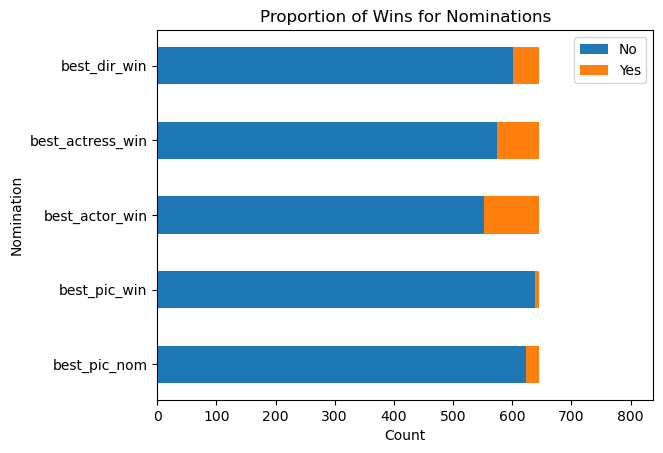

In [75]:
# Create a stacked bar chart to display the proportion of wins (nominations) 
#   for the 5 `best_*` variables.

# plt.bar(sum.columns,sum.loc["no",:])
nominations = movies.iloc[:,18:23]
sum = nominations.apply(pd.Series.value_counts)

species = tuple(sum.columns)
weight_counts = {
    "No": sum.loc["no",:],
    "Yes": sum.loc["yes",:],
}

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(5)

for boolean, weight_count in weight_counts.items():
    p = ax.barh(species, weight_count, width, label=boolean, left=bottom)
    bottom += weight_count

ax.set_title("Proportion of Wins for Nominations")
plt.xlabel('Count')
plt.ylabel('Nomination')
ax.legend(loc="upper right")

plt.margins(x=0.3, y=0.05)

plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(k) Visualization: Multiple variables 

Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. `audience_score` for each `mpaa_rating`.


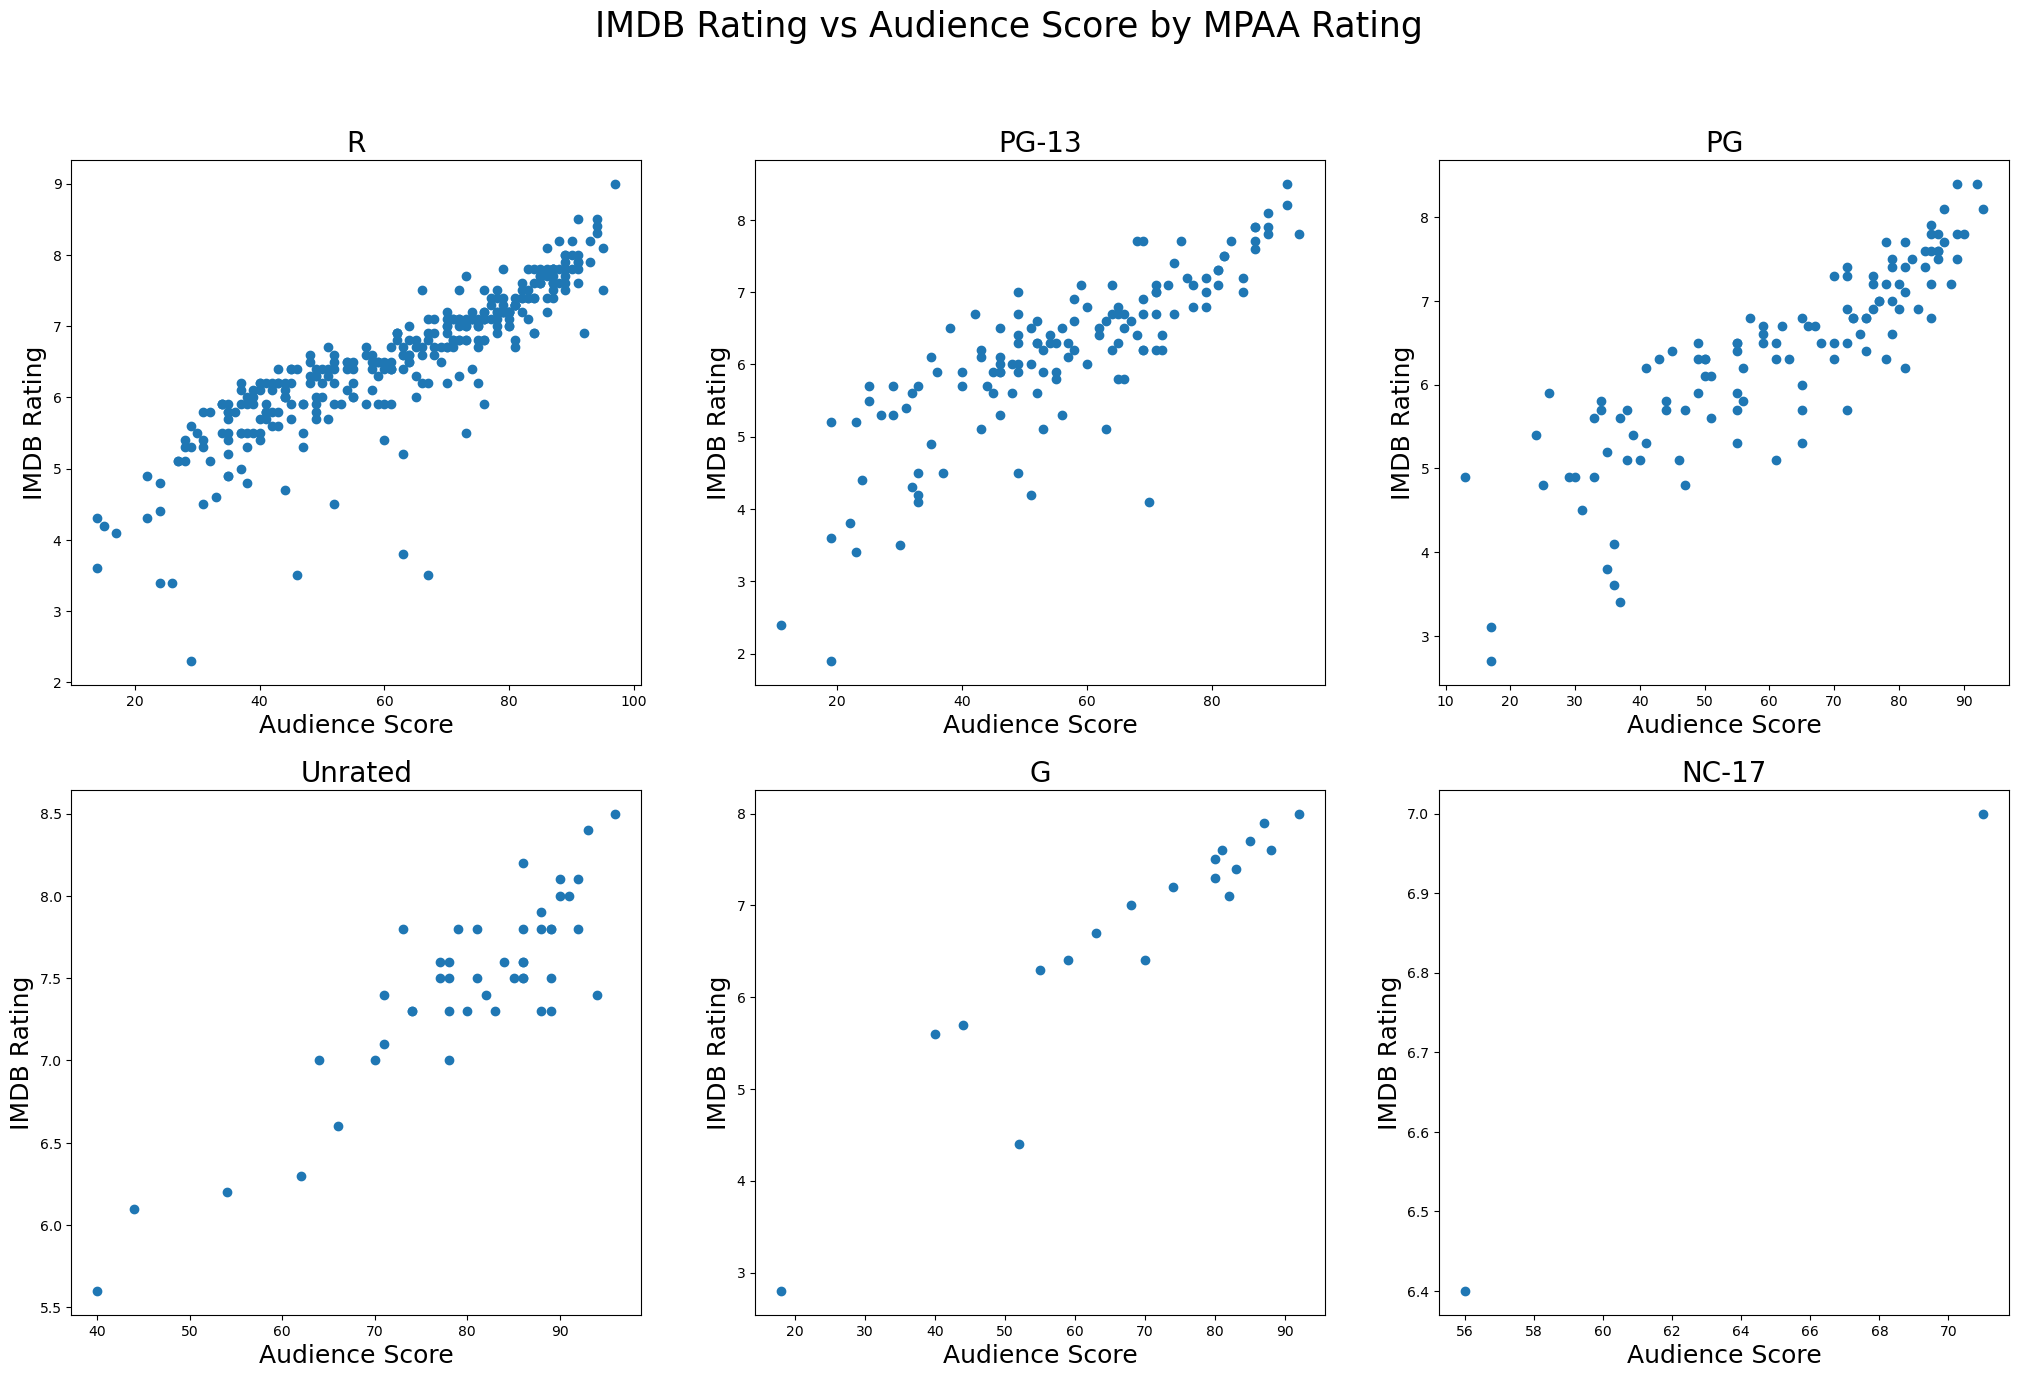

In [182]:

# Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. 
#   `audience_score` for each `mpaa_rating`.
mpaa_ratings = movies["mpaa_rating"].unique()
facets_count = len(mpaa_ratings)
ncols = 3
nrows = math.ceil(4/ncols)
plt.figure(figsize=(25,15))
for i, rating in enumerate(mpaa_ratings):
  plt.subplot(nrows,ncols,i+1)
  pltdata = movies[movies.mpaa_rating == rating]
  plt.scatter(pltdata["audience_score"], pltdata["imdb_rating"])
  plt.xlabel("Audience Score", fontsize = 18)
  plt.ylabel("IMDB Rating", fontsize = 18)
  plt.title(rating, fontsize = 20)
  plt.suptitle("IMDB Rating vs Audience Score by MPAA Rating", fontsize=25)

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Q1(bonus)   

Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. `audience_score` for each `mpaa_rating`, colored with the top 3 `genres`.

/tmp/ipykernel_107038/335348265.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["Top_3_Genres"] = movies.apply(lambda row: "Yes" if row.genre in top3Genres else "No", axis = 1)


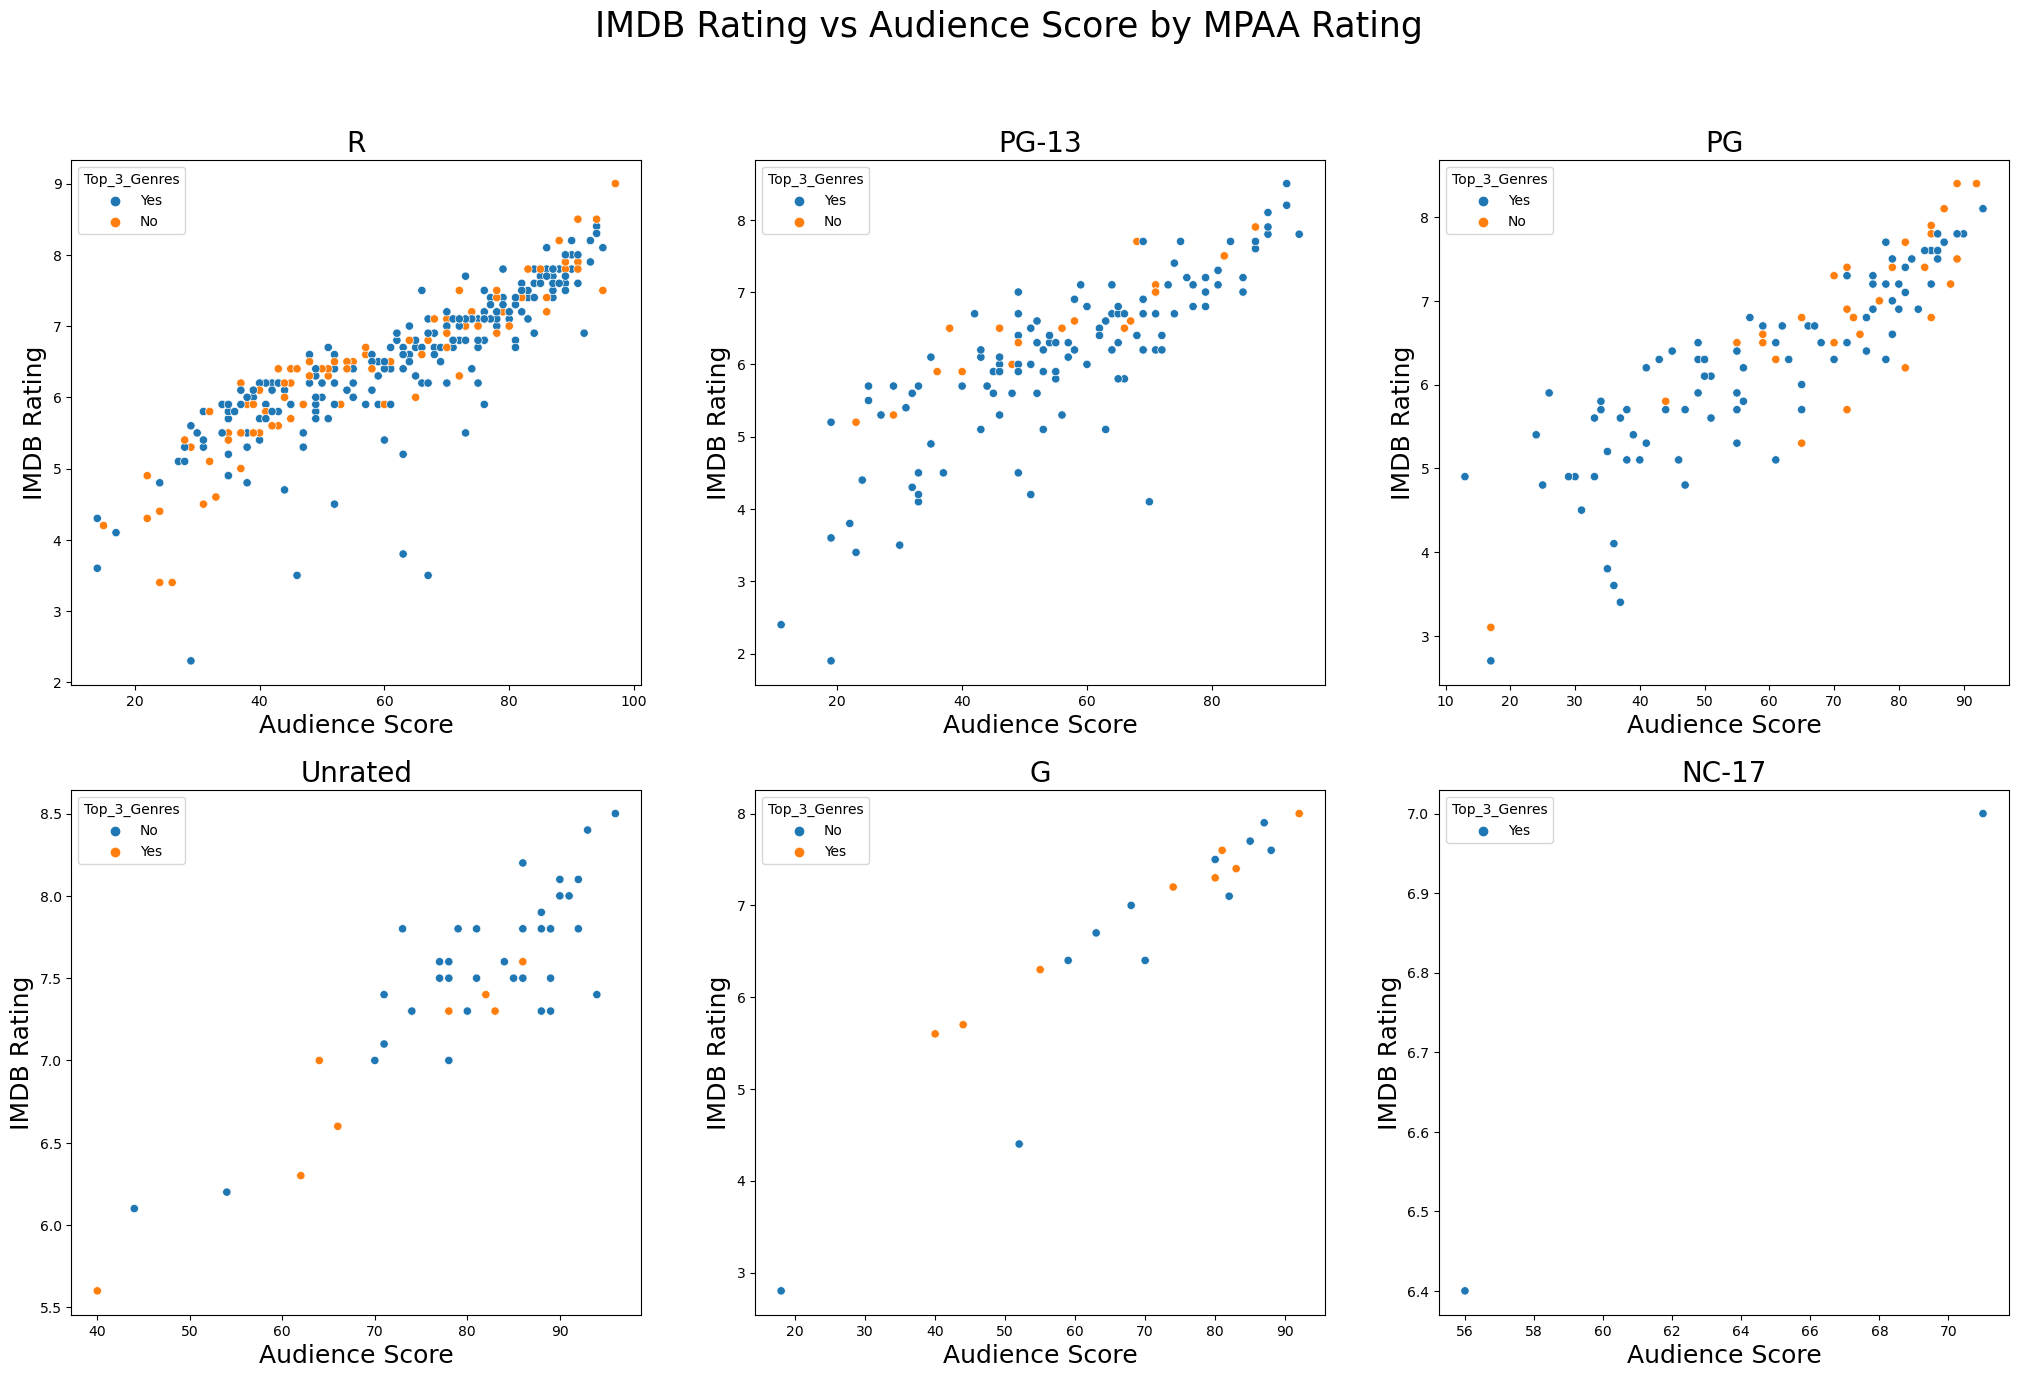

In [181]:

# Create a small multiples (or faceted) scatter plot of `imdb_rating` vs. 
#   `audience_score` for each `mpaa_rating`, colored by the top 3 `genre`

mpaa_ratings = movies["mpaa_rating"].unique()
top3Genres = movies.groupby("genre")["genre"].count().sort_values(ascending=False)[:3].index.to_list()
movies["Top_3_Genres"] = movies.apply(lambda row: "Yes" if row.genre in top3Genres else "No", axis = 1)
movies[["genre", "Top_3_Genres"]].head(10)
facets_count = len(mpaa_ratings)
ncols = 3
nrows = math.ceil(4/ncols)
plt.figure(figsize=(25,15))
for i, rating in enumerate(mpaa_ratings):
  plt.subplot(nrows,ncols,i+1)
  pltdata = movies[movies.mpaa_rating == rating]
  sns.scatterplot(data=pltdata, x = "audience_score", y="imdb_rating", hue="Top_3_Genres")
  plt.xlabel("Audience Score", fontsize=18)
  plt.ylabel("IMDB Rating", fontsize=18)
  plt.title(rating, fontsize=20)
  plt.suptitle("IMDB Rating vs Audience Score by MPAA Rating", fontsize=25)

plt.show();

<!-- END QUESTION -->

# Q2 - Performance Metrics 

Write a function to calculate: 
(a) true positive rate,
(b) false positive rate, 
(c) accuracy, and 
(d) Matthews Correlation Coefficient (MCC). 

You can make use of `sklearn.metrics` functions. 

The function will have inputs of `y_true` (np.array) - the true label for a set of samples and `y_pred` (np.array) - the predicted labels for a set of samples, and a threshold `thres_value` (float). 

The function returns a list of the true positive rate, false positive rate, accuracy and MCC for the inputs where the predicted labels are thresholded at the provided value (using >= comparisons). 


This function will then be used to create a DataFrames  with rows corresponding with the 10 thresholds (y_pred values) and columns reporting the different thresholds, the true positive rate (TPR), false positive rate (FPR), accuracy (ACC), and Matthews correlation coefficient (MCC).



In [81]:

def calc_metrics(y_true, y_pred, thres_value):
    # Calculate tpr, fpr, accuracy, and MCC on input
    # Input: 
    #  y_true - sample labels       (np.array)
    #  y_pred - sample predictions  (np.array)
    #  thres_value - threshold for predictions,  >= 
    # Return list of tpr, fpr, accuracy, and MCC 
    
    y_pred2 = (y_pred >= thres_value)
    cm = metrics.confusion_matrix(y_true, y_pred2)
    tP = cm[1,1] 
    fP = cm[0,1]
    tN = cm[0,0] 
    fN = cm[1,0] 
    acc = metrics.accuracy_score(y_true, y_pred2)
    mcc = metrics.matthews_corrcoef(y_true, y_pred2)
    tpr = metrics.recall_score(y_true, y_pred2)
    fpr = fP / (tN + fP)
    return (tpr, fpr, acc, mcc)

y_true = np.array([1,1,0,1,1,0,1,0,0,0])
y_pred = np.array([0.98,0.92,0.85,0.77,0.71,0.64,0.57,0.42,0.34,0.32])

perfDF = pd.DataFrame(columns = ['Threshold', 'TPR', 'FPR', 'ACC', 'MCC']) 
for thres in y_pred: 
    tpr_val, fpr_val, acc_val, mcc_val = calc_metrics(y_true, y_pred, thres)
    perfDF = perfDF.append({'Threshold' : thres, 'TPR' : tpr_val, 
                            'FPR' : fpr_val, 'ACC': acc_val, 'MCC': mcc_val}, 
                           ignore_index = True)

perfDF

,Threshold,TPR,FPR,ACC,MCC
0,0.98,0.2,0.0,0.6,0.333333
1,0.92,0.4,0.0,0.7,0.500000
2,0.85,0.4,0.2,0.6,0.218218
3,0.77,0.6,0.2,0.7,0.408248
4,0.71,0.8,0.2,0.8,0.600000
5,0.64,0.8,0.4,0.7,0.408248
6,0.57,1.0,0.4,0.8,0.654654
7,0.42,1.0,0.6,0.7,0.500000
8,0.34,1.0,0.8,0.6,0.333333
9,0.32,1.0,1.0,0.5,0.000000


In [82]:
grader.check("q2")

q2 results: All test cases passed!

<!-- BEGIN QUESTION -->

# Q3 - Plot ROC Curve:

Use the results from Question 2 to plot the ROC curve for the data. 

Note, plot this curve using the standard plotting tools rather than any special library/package available for making ROC plots.

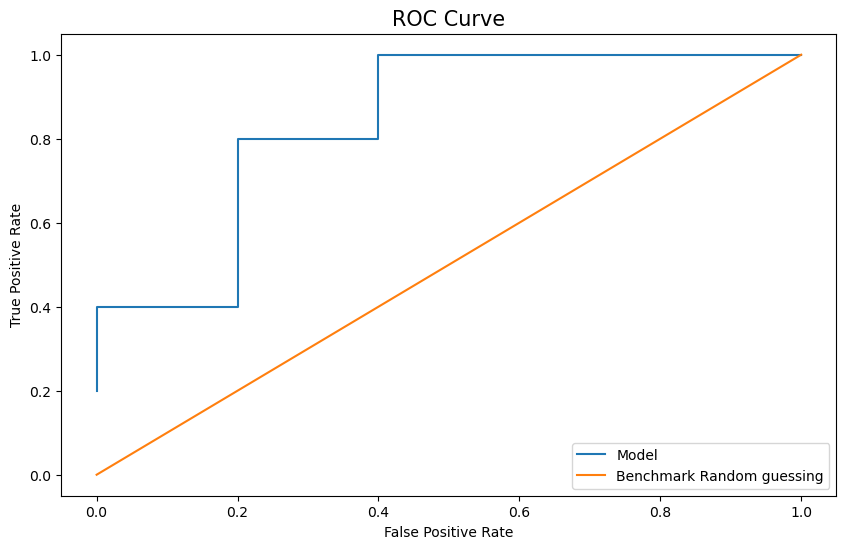

In [88]:
# Create a ROC curve using the results from Q2
plt.figure(figsize=(10,6))
plt.plot(perfDF["FPR"], perfDF["TPR"], label="Model")
plt.plot([0,1], [0,1], label="Benchmark Random guessing")
plt.title("ROC Curve", fontsize=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right");

<!-- END QUESTION -->

# Q4 - NBA Winners

For this problem you will use a data set of NBA basketball games (2016 - 2021 seasons).  The dataset was collected from the NBA website API - https://www.nba.com 

You will use the data to predict whether team A in each matchup will win the game. 

The data consists of variables:

* `SEASON_ID`, `GAME_ID`, `GAME_DATE` - variables to identify individual samples (ignore for prediction)
* `TEAM_A`, `TEAM_B`, `MATCHUP` - variables describing the two teams in a game (ignore for prediction)  
* `WON` - This is the target / class feature to be predicted

The remaining variables are predictor variables for the models.  They come in pairs "*\_DIFF" and "*\_A" reporting the given statistic as the difference between Team A and Team B and the statistic itself for Team A. 

* `FG_PCT_DIFF`, `FG_PCT_A` - field goal percentage.  
* `FG3_PCT_DIFF`, `FG3_PCT_A` - percentage of 3-point shots made.
* `FT_PCT_DIFF`, `FT_PCT_A` - percentage of free throws made.
* `REB_DIFF`, `REB_A` - number of rebounds.
* `AST_DIFF`, `AST_A` - number of assists.
* `STL_DIFF`, `STL_A` - number of steals.
* `TOV_DIFF`, `TOV_A` - number of turnovers.
* `PF_DIFF`, `PF_A` - number of personal fouls.


## Q4(a) - Load Data 

Load the `nba` data and drop the samples with missing data.

Create a DataFrame `nbaX` with the predictor variables and `nbaY` with the target variable.

In [143]:
nba = pd.read_csv("data/nba-simple.csv") 
nba.dropna(inplace=True)

nbaX = nba.iloc[:,7:]
nbaY = nba["WON"]

nba.head()

,SEASON_ID,GAME_ID,GAME_DATE,TEAM_A,TEAM_B,MATCHUP,WON,FG_PCT_DIFF,FG_PCT_A,FG3_PCT_DIFF,...,REB_DIFF,REB_A,AST_DIFF,AST_A,STL_DIFF,STL_A,TOV_DIFF,TOV_A,PF_DIFF,PF_A
0,42019,41900406,10/11/20,MIA,LAL,MIA vs. LAL,0,-0.040,0.443,0.043,...,-5,41,2,25,-1,4,1,13,-4,18
1,42019,41900405,10/9/20,LAL,MIA,LAL vs. MIA,0,0.005,0.463,-0.056,...,6,41,-5,21,3,10,2,15,2,21
2,42019,41900404,10/6/20,MIA,LAL,MIA vs. LAL,0,-0.016,0.427,-0.015,...,-3,39,-7,18,3,8,-4,11,7,21
3,42019,41900403,10/4/20,MIA,LAL,MIA vs. LAL,1,0.083,0.513,0.020,...,-6,37,2,25,0,8,-7,12,1,23
4,42019,41900402,10/2/20,LAL,MIA,LAL vs. MIA,1,-0.002,0.505,-0.067,...,7,44,3,32,4,6,0,9,3,26


In [144]:
grader.check("q4a")

q4a results: All test cases passed!

## Q4(b) - Labels 

Let's understand the what we should expect as a baseline performance for predicting whether team A wins. 

(i). What fraction of games has team A as the winner? Value should be in between 0 and 1.  
(ii).  What should a constant classifier model predict?   A *constant classifier* always predicts the same value no matter the input.   
(iii).  What is the error rate of the constant classifier? Value should be in between 0 and 1. 

Answer the following questions below.  Note, you should not use any `sklearn` functions, but simply look at properties of the data labels. 


In [145]:
q4b_i = np.sum(nbaY)/len(nbaY)

q4b_ii = 1 

q4b_iii = 1 - q4b_i

In [146]:
grader.check("q4b")

q4b results: All test cases passed!

## Q4(c) Model Selection and Evaluation: Three-fold Split

Split the data into training, validation and test sets with 60, 20, and 20% of the data respectively. Make sure to split the data such that the distribution of class labels is approximately equal across splits - “stratify”.

Set the seed for the random generator in `random_state` to ”4821”

In [147]:
# Split of the test set
X_trainval, X_test, y_trainval, y_test = train_test_split(nbaX, nbaY, test_size=0.2, random_state=4821, stratify=nbaY)

# Split trainval into train + val 
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=4821, stratify=y_trainval)

In [148]:
grader.check("q4c")

q4c results: All test cases passed!

## Q4(d) Scaling 

Scale the predictor data with standard scaling or normalizaiton. 

Make sure to use training data set to set scaling parameters and apply those parameters to scaling the validation and testing data.

Create scaled train+val data on this same set to build the best model, and use those parameters to scale the test data to evaluate the best model. 

Helpful functions: Python - `StandardScaler` from `sklearn.preprocessing`.

In [149]:
scaler = StandardScaler()
scaler.fit(X_train,y_train)
X_train_sc = scaler.transform(X_train)
X_val_sc = scaler.transform(X_val)

scaler_final = StandardScaler()
scaler_final.fit(X_trainval, y_trainval)
X_trainval_sc = scaler_final.transform(X_trainval)
X_test_sc = scaler_final.transform(X_test)

In [150]:
grader.check("q4d")

q4d results: All test cases passed!

## Q4(e)  KNN - K Nearest Neighbors
For values of k, [3, 7, 11, 15, 19, 23, 27, 31], fit a k-nearest-neighbor classifier to the training data. 

* fit a k nearest neighbors model to the training data 
* evaluate the classifier on the training and validation set using auc
* select the best value of k
* create a best model on train+validation
* evaluate the classifier on the test data. 
* plot the training and validation performance vs k;  
add a line showing the test performance

Best k:  19
Test Perf:  0.893046


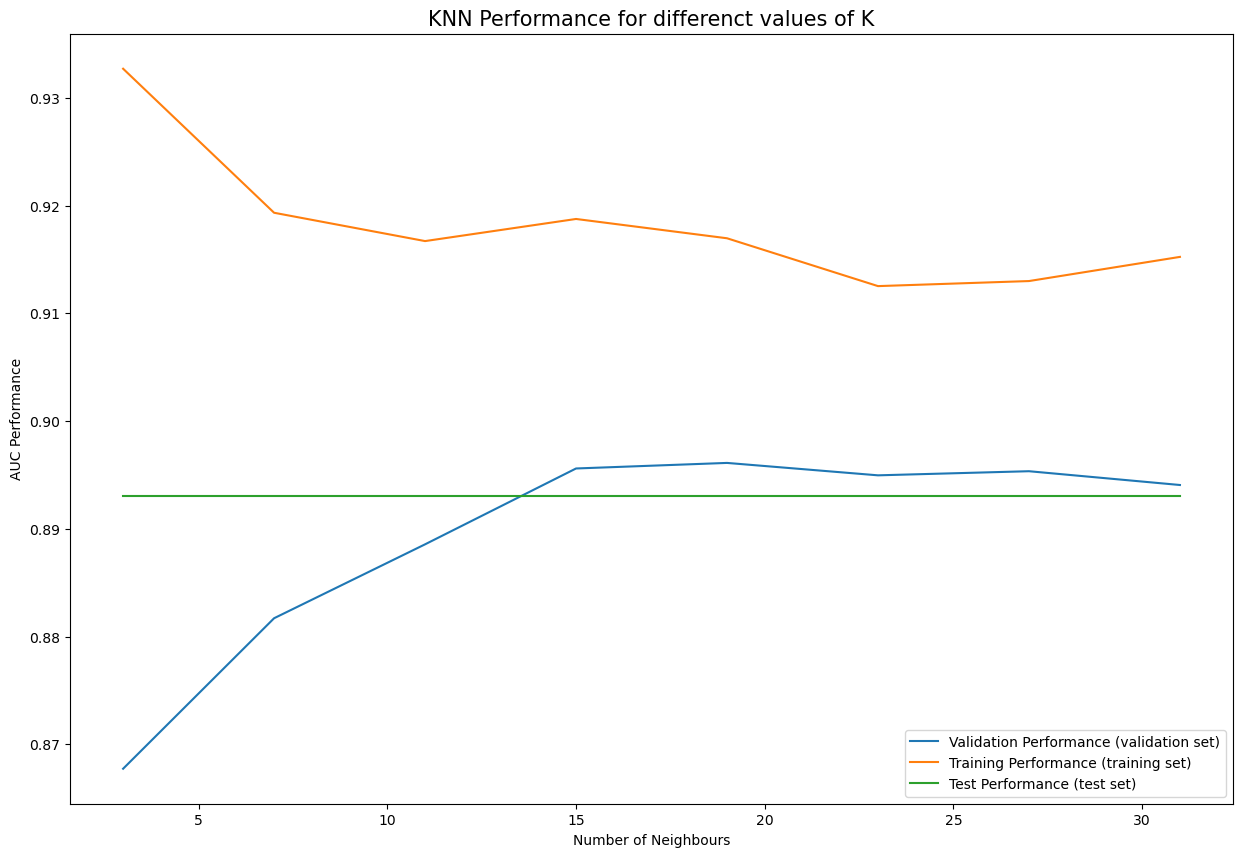

In [151]:
kvals = [3, 7, 11, 15, 19, 23, 27, 31]

knn_auc_val = np.zeros((1,len(kvals)))
knn_auc_tr = np.zeros((1,len(kvals)))


# fit a k nearest neighbors model to the training data
# evaluate the classifier on the training and validation set using auc
for i, k in enumerate(kvals):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc, np.ravel(y_train))
    yhatval = knn.predict(X_val_sc)
    yhattrain = knn.predict(X_train_sc)
    knn_auc_val[0, i] = metrics.roc_auc_score(y_val, yhatval)
    knn_auc_tr[0, i] = metrics.roc_auc_score(y_train, yhattrain)

# select the best value of k
knn_bestk = kvals[np.argmax(knn_auc_val[0])]

# create a best model on train+validation
knn2 = KNeighborsClassifier(n_neighbors=knn_bestk)
knn2.fit(X_trainval_sc, np.ravel(y_trainval))
yhat = knn2.predict(X_test_sc)

# evaluate the classifier on the test data.
knn_auc_test = metrics.roc_auc_score(y_test, yhat)

# plot the training and validationing performance vs k.
plt.figure(figsize=(15,10))
plt.plot(kvals, knn_auc_val.ravel(), label="Validation Performance (validation set)")
plt.plot(kvals, knn_auc_tr.ravel(), label="Training Performance (training set)")
plt.plot([np.min(kvals), np.max(kvals)], [knn_auc_test, knn_auc_test], label="Test Performance (test set)")
plt.xlabel("Number of Neighbours")
plt.ylabel("AUC Performance")
plt.legend(loc="lower right")
plt.title("KNN Performance for differenct values of K", fontsize=15)
#   add a line for test performance 

print('Best k:  %d' % (knn_bestk))
print('Test Perf:  %.6f' % (knn_auc_test))

In [152]:
grader.check("q4e")

q4e results: All test cases passed!

## Q4(f)  Decision Trees

For values of max_leaf_nodes nodes [5, 10, 25, 50, 75, 100, 150], fit the Decision Trees classifier to the training data. 

- fit a decision tree model to the training data (use `random_state=4821`)
- evaluate the classifier on the training and validation set using auc
- select the best max_leaf_nodes
- retrain the best model on train+validation 
- report the auc on the testing data.
- plot the train and validation auc vs max_leaf_nodes;  
add a line for the test auc performance 
- print out the best tree.

Best max_leaf_nodes:  75
Test Perf:  0.865113


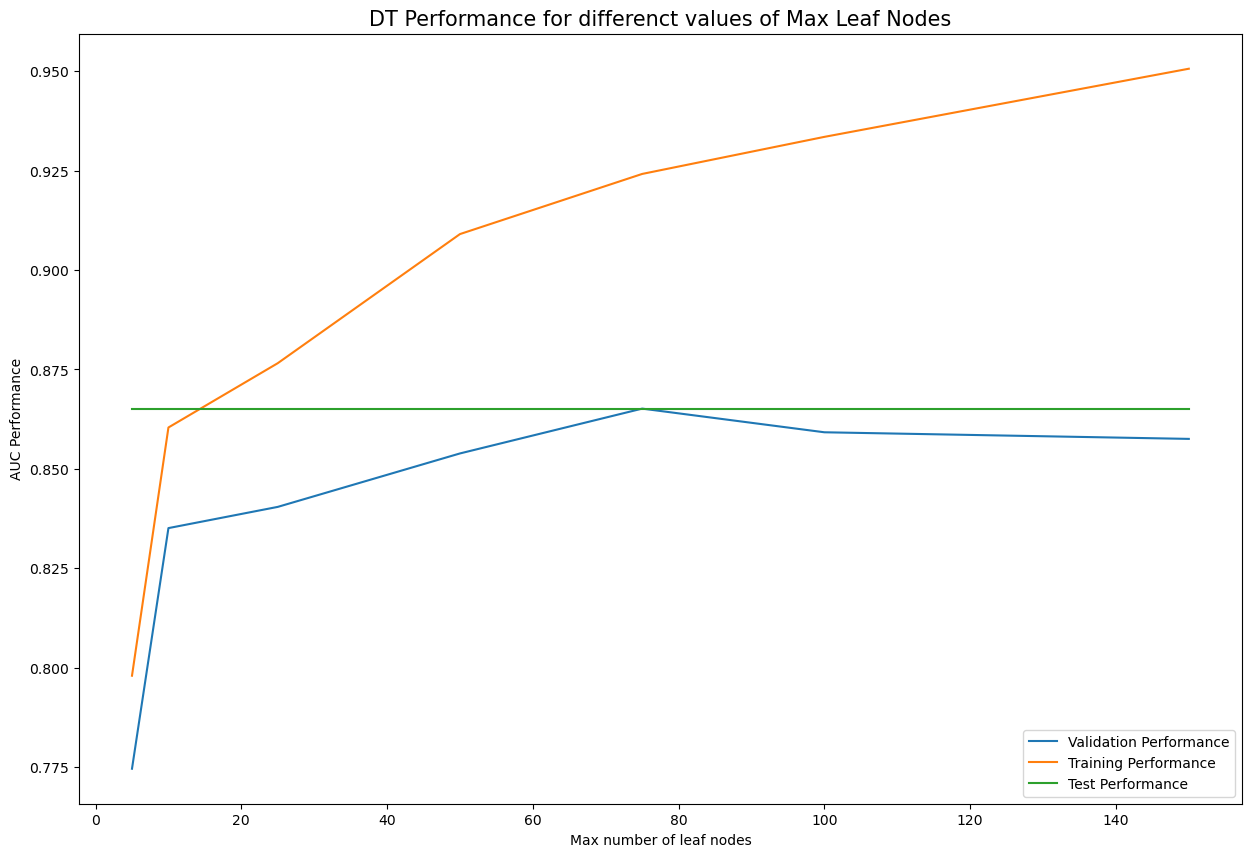

In [153]:
nodes = [5, 10, 25, 50, 75, 100, 150]

dt_auc_val = np.zeros((1,len(nodes)))
dt_auc_tr = np.zeros((1,len(nodes)))

# fit a decision tree model to the training data (use random_state=4821)
# evaluate the classifier on the training and validation set using auc

for i, k in enumerate(nodes):
    dt = DecisionTreeClassifier(max_leaf_nodes = k, random_state = 4821)
    dt.fit(X_train_sc, np.ravel(y_train))
    yhatval = dt.predict(X_val_sc)
    yhattrain = dt.predict(X_train_sc)
    dt_auc_val[0, i] = metrics.roc_auc_score(y_val , yhatval)
    dt_auc_tr[0, i] = metrics.roc_auc_score(y_train , yhattrain)

# select the best max_leaf_nodes
dt_bestn = nodes[np.argmax(dt_auc_val)]

# retrain the best model on train+validation
dt2 = DecisionTreeClassifier(max_leaf_nodes = dt_bestn, random_state = 4821)
dt2.fit(X_trainval_sc, np.array(y_trainval).ravel())
yhat = dt2.predict(X_test_sc)

# report the auc on the testing data.
dt_auc_test = metrics.roc_auc_score(y_test, yhat)

# plot the train and validation auc vs max_leaf_nodes.
#   add a line for test performance 
plt.figure(figsize=(15,10))
plt.plot(nodes, dt_auc_val.ravel(), label="Validation Performance")
plt.plot(nodes, dt_auc_tr.ravel(), label="Training Performance")
plt.plot([np.min(nodes), np.max(nodes)], [dt_auc_test, dt_auc_test], label="Test Performance")
plt.xlabel("Max number of leaf nodes")
plt.ylabel("AUC Performance")
plt.legend(loc="lower right")
plt.title("DT Performance for differenct values of Max Leaf Nodes", fontsize=15)

print('Best max_leaf_nodes:  %d' % (dt_bestn))
print('Test Perf:  %.6f' % (dt_auc_test))

In [154]:
grader.check("q4f")

q4f results: All test cases passed!

## Q4(g)  Naive Bayes 

Use the GaussianNB on training + validation data and report the training+val and testing data performance (auc). 


In [155]:
# q4g

NB = GaussianNB()
NB.fit(X_trainval_sc, np.ravel(y_trainval))

y_trainval_hat = NB.predict(X_trainval_sc)
y_test_hat = NB.predict(X_test_sc)

nb_auc_trainval = roc_auc_score(y_trainval, y_trainval_hat)
nb_auc_test = roc_auc_score(y_test, y_test_hat)

print(f'training+val performance: {nb_auc_trainval}')
print(f'test performance: {nb_auc_test}')

training+val performance: 0.8591755449433351
test performance: 0.8421700353275033


In [156]:
grader.check("q4g")

q4g results: All test cases passed!

## Q4(h) Support Vector Machines + GridSearch with Cross-validation (without using GridSearchCV) 

In this part, you will use the *do-it-yourself* approach using `StratifiedKFold` (rather than GridSearchCV). 

Use the same split from above with 80% train+val, 20% test data. 

With the train+val data, use 10-fold cross-validation (make sure to use Stratified approach with random_state = 4821).  Train each model on the training set and evaluate each model on the validation set.  Consider how to do scaling with this approach.  You will consider SVM models with the following hyperparameters: 

* Polynomial kernel with C = [10^-2, 10^-1, 1], degree = [1, 2, 3]
* RBF kernel (Gaussian kernel) with C = [10^-2, 10^-1, 1] 

Collect each model's validation performance. 

Report the mean validation performance (AUC) as DataFrame with: 

- rows, Linear kernel, poly kernel d=2, poly kernel d=3, rbf kernel 
- columns, C = [10^-2, 10^-1, 1]

Report the best parameter combination (cost + kernel). 

Retrain the best model on train+val (same used above for the other classifiers) and report the test performance.

In [178]:
# With the train+val data, use 10-fold cross-validation (with StratifiedKFold )
kf = StratifiedKFold(n_splits=10, random_state=4821, shuffle=True)
kf.get_n_splits(X_trainval, y_trainval)

# Train each model on the train set, evaluate each model on the validation set
# set up scaling 
# You will consider SVM models with the following hyperparameters: 
# - Polynomial kernel with C = [10^-2, 10^-1, 1], degree = [1, 2, 3]
# - RBF kernel (Gaussian kernel) with C = [10^-2, 10^-1, 1]

# Initialise hyper parameters to cycle through
degrees = [1,2,3,4] # 4 not to be used but act as an identifier to use rbf kernel
kernals = ["poly", "rbf"]
Cs = [10**-2, 10**-1, 1]

# Initialise dataframe to hold results
acc_df = pd.DataFrame(columns=["0.01", "0.1", "1"], index = ["Linear kernel", "poly kernel d=2", "poly kernel d=3", "rbf kernel"])

# Loop through different sets of parameters 
for c_i, c in enumerate(Cs):
    for d_i, d in enumerate(degrees):
        # initialize list to hold accuracies during cross validation
        avg_acc = []
        
        # loop through different folds and validate sets of hyper parameters
        for j, (train_idx, val_idx) in enumerate(kf.split(X_trainval, y_trainval)):
            
            # Get current fold data
            x_train_fold_j = X_trainval.iloc[train_idx,:]
            y_train_fold_j = y_trainval.iloc[train_idx]
            x_val_fold_j = X_trainval.iloc[val_idx,:]
            y_val_fold_j = y_trainval.iloc[val_idx]
            
            # Scale data for current fold
            scaler = StandardScaler()
            scaler.fit(x_train_fold_j, y_train_fold_j)
            x_train_fold_j_sc = scaler.transform(x_train_fold_j)
            x_val_fold_j_sc = scaler.transform(x_val_fold_j)
            
            # check degree. Degree 4 represents an rbf kernel to minimize number of for loops
            # for degree 1 to three initialize svm with kernel poly and set degree
            if d < 4:
                svmModel = svm.SVC(kernel="poly", C=c, degree = d, coef0=1)
                svmModel.fit(x_train_fold_j_sc, np.ravel(y_train_fold_j))
                yhat_val_fold_j = svmModel.predict(x_val_fold_j_sc)
                # Collect each model's validation performance.
                avg_acc.append(roc_auc_score(y_val_fold_j, yhat_val_fold_j))
            # if degree is 4, initialize svm model with kernel rbf and ignore degree parameter
            else:
                svmModel = svm.SVC(kernel="rbf", C=c)
                svmModel.fit(x_train_fold_j_sc, np.ravel(y_train_fold_j))
                yhat_val_fold_j = svmModel.predict(x_val_fold_j_sc)
                # Collect each model's validation performance.
                avg_acc.append(roc_auc_score(y_val_fold_j, yhat_val_fold_j))
                
        # Report the mean validation performance (AUC) as DataFrame with: 
        #   - rows, Linear kernel, poly kernel d=2, poly kernel d=3, rbf kernel 
        #   - columns, C = [10^-2, 10^-1, 1]
        
        # add average accuracies to dataframe
        if d == 4:
            acc_df.iloc[3, c_i] = np.average(avg_acc)
        else:
            acc_df.iloc[d_i, c_i] = np.average(avg_acc)



svm_results = acc_df

# # Report the best parameter combination (cost + kernel). 
svm_bestC = np.float64(acc_df.columns[np.argmax(svm_results.max())])
svm_bestKernel = "poly" if np.argmax(svm_results.iloc[:,np.argmax(svm_results.max())]) < 3 else "rbf"
svm_bestD = np.argmax(svm_results.iloc[:,np.argmax(svm_results.max())]) + 1

# # Retrain the best model on train+val (same data used above for the other 
scaler = StandardScaler()
scaler.fit(X_trainval, y_trainval)
x_trainval_sc = scaler.transform(X_trainval)
x_test_sc = scaler.transform(X_test)

svmModel2 = svm.SVC(kernel=svm_bestKernel, C=svm_bestC, degree = svm_bestD, coef0=1)
svmModel2.fit(x_trainval_sc, np.ravel(y_trainval))
yhat = svmModel2.predict(x_test_sc)

#   classifiers) and report the test performance .
svm_auc_test = roc_auc_score(y_test, yhat)
print(f"AUC Best Params: C: {svm_bestC}, kernel: {svm_bestKernel}, degree: {svm_bestD}")
print(f"Best score: {svm_auc_test}")

svm_results.head()

AUC Best Params: C: 0.1, kernel: poly, degree: 3
Best score: 0.9289695869081402


,0.01,0.1,1
Linear kernel,0.914331,0.924569,0.927308
poly kernel d=2,0.920994,0.928482,0.929375
poly kernel d=3,0.922563,0.929508,0.928288
rbf kernel,0.890947,0.922462,0.928259


In [179]:
grader.check("q4h")

q4h results: All test cases passed!

## Q4(i) Ensemble Methods + GridSearchCV with Pipelines

Let’s examine bagging & boosting ensemble approaches for prediction.

For this part, we will use the ultimately preferred method for building predictor models by using pipelines. 

You will create a pipeline for both the Random Forest models and the AdaBoost models. Both pipelines will use standard scaling preprocessing. 

For the random forest, consider hyper-parameters for the maximum number of features: [2, 4, 8, 16] and number of estimators of [25, 50, 100].  For AdaBoost, consider the hyper-parameter of the number of estimators as [10, 25, 50, 100]. 

To ensure repeatability or your code (and to compare to the autograder) make sure to set the random state in both classifiers and the stratified 10-fold cross-validation to "4821".  

Use AUC as the scoring metric for the GridSearch criteria.  

You will need to report the best hyper-parameters for both models as well as the final test set performance. 


In [174]:
# You will create a pipeline for both the Random Forest and AdaBoost models. 
# Both pipelines will use standard scaling preprocessing. 
rf_pipe = Pipeline([('scale_rf', StandardScaler()), ('rf', RandomForestClassifier(random_state=4821))])
ab_pipe = Pipeline([('scale_ada', StandardScaler()), ('ada', AdaBoostClassifier(random_state=4821))])

# RF: hyper-parameters for the maximum number of features: [2, 4, 8, 16] and 
#   number of estimators of [25, 50, 100].
rf_param_grid = {
    'rf__max_features': [2, 4, 8, 16],
    'rf__n_estimators': [25, 50, 100]}

# AdaBoost: hyper-parameter of the number of estimators as [10, 25, 50, 100].
ab_param_grid = {
    'ada__n_estimators': [10, 25, 50, 100]}

# Set the random state in both classifiers and the stratified k-fold cv to 4821  
cvStrat = StratifiedKFold(n_splits=10, shuffle=True, random_state=4821)

# Use AUC as the scoring metric for the GridSearch criteria. 
rf_grid = GridSearchCV(rf_pipe, param_grid=rf_param_grid, scoring='roc_auc', cv=cvStrat) 
ab_grid = GridSearchCV(ab_pipe, param_grid=ab_param_grid, scoring='roc_auc', cv=cvStrat)

# Fit the models
rf_grid.fit(X_trainval, y_trainval)
ab_grid.fit(X_trainval, y_trainval)

# Report the best hyper-parameters and final test set performance 
rf_best_params = rf_grid.best_params_
ab_best_params = ab_grid.best_params_

# Select the best models
rf_best_model = rf_grid.best_estimator_
ab_best_model = ab_grid.best_estimator_

# Test on the test set
rf_y_hat = rf_best_model.predict(X_test)
ab_y_hat = rf_best_model.predict(X_test)

rf_auc_test = roc_auc_score(y_test, rf_y_hat)
ab_auc_test = roc_auc_score(y_test, ab_y_hat)

In [176]:
grader.check("q4i")

q4i results: All test cases passed!

# Submission 

1. Make sure you have run all cells in your notebook in order, so that all images/graphs appear in the output, then save your notebook.
2. Print your notebook to a PDF
    * Using Jupyter Lab 
        * Option A:  Select "File" -> "Print ..." save as a PDF 
        In my test on my local machine with Safari and Chrome on MacOS, the resulting PDF is saved to the Downloads folder on your local machine. 
        * Option B: Select "File" -> "Save and Export Notebook as ..." -> HTML, then open HTML file in a Browser and Print to PDF  
        In my test, the resulting HTML file is saved to the Downloads folder.  Then, can print the html to a PDF using the browser. 
    * Using Jupyter notebook  
        * Select "File" -> "Download as" -> "HTML", then open HTML file in a Browser and Print to PDF  
        In my test, the resulting HTML file is saved to the Downloads folder.  Then, can print the html to a PDF using the browser. 

3. Gather the PDF and HTML together. 
4. Zip the notebook and PDF together and submit on Gradescope 